In [1]:
import pandas as pd
import toad.transform


def fe_application(df):
    #上班天数比例
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    # 收入和授信比例
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    # 家庭人均收入   收入/家庭人口
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    # 年金/收入 比例
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    # 年金/授信比例
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    ft_list = ['income_per_person', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON',
               'ANNUITY_INCOME_PERC', 'PAYMENT_RATE']
    return df, ft_list

In [2]:
import pandas as pd
application_train_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\application_train_cleaned.csv')
application_train_ft, new_application_fts = fe_application(application_train_ft)
df_ft = application_train_ft

In [3]:
bureau_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_balance.csv')
bureau_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_cleaned.csv')
pos_cash_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\pos_cash_balance_cleaned.csv')
credit_card_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\credit_card_balance_cleaned.csv')
previous_application_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\previous_application_cleaned.csv')
installment_payments_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\installment_payments_cleaned.csv')

In [39]:
x=df_ft.drop(['TARGET'],axis=1)
y=df_ft['TARGET']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
x_train.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
111026,228804,0,-15143,-4129.0,-4900,1,1,0,1,0,...,Self-employed,-1,-1,-1,-1,0.272667,0.413551,112500.0,0.113300,0.046855
111731,229621,1,-12028,-866.0,-4094,1,1,0,1,0,...,Transport: type 2,reg oper account,block of flats,Panel,No,0.071999,0.186211,112500.0,0.157400,0.029310
71962,183452,0,-19007,-3401.0,-2542,1,1,0,1,0,...,Self-employed,-1,-1,-1,-1,0.178934,0.487031,78750.0,0.123086,0.059947
262442,403830,1,-10491,-3473.0,-3154,1,1,0,1,0,...,Trade: type 7,-1,block of flats,"Stone, brick",No,0.331046,0.666667,225000.0,0.075000,0.050000
285962,431192,0,-24047,-1.0,-4561,1,0,0,1,0,...,-1,reg oper account,block of flats,"Stone, brick",No,0.000042,0.655141,162000.0,0.107028,0.070118


In [50]:
y_train.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
83449,196790,1,-15095,-2078.0,-3699,1,1,0,1,0,...,Business Entity Type 3,-1,-1,-1,-1,0.137661,0.500000,67500.0,0.100000,0.050000
281010,425582,0,-19593,-550.0,-2761,1,1,0,1,0,...,Self-employed,-1,-1,-1,-1,0.028071,0.122754,33750.0,0.240133,0.029477
53194,161604,0,-16301,-1249.0,-4549,1,1,0,1,0,...,Self-employed,-1,block of flats,Panel,No,0.076621,0.666667,90000.0,0.075000,0.050000
173559,301131,1,-14808,-1.0,-4264,1,0,0,1,0,...,-1,-1,block of flats,Panel,No,0.000068,0.220000,82500.0,0.133436,0.029356
281352,425942,1,-16954,-1969.0,-441,1,1,0,1,0,...,Industry: type 3,-1,-1,-1,-1,0.116138,0.555556,75000.0,0.090000,0.050000


In [43]:
xy_train = pd.concat([x_train,y_train],axis=1)
xy_train

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
111026,228804.0,0.0,-15143.0,-4129.0,-4900.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111731,229621.0,1.0,-12028.0,-866.0,-4094.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71962,183452.0,0.0,-19007.0,-3401.0,-2542.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262442,403830.0,1.0,-10491.0,-3473.0,-3154.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285962,431192.0,0.0,-24047.0,-1.0,-4561.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Business Entity Type 3,-1,-1,-1,-1,0.109103,0.250860,157500.0,0.143186,0.035920
305758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Business Entity Type 2,-1,-1,-1,-1,0.270613,0.666667,67500.0,0.073900,0.049267
297708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Business Entity Type 3,-1,block of flats,"Stone, brick",No,0.219417,0.300000,135000.0,0.170200,0.051060
154425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Government,-1,-1,-1,-1,0.069565,0.333333,45000.0,0.150000,0.050000


In [52]:
import toad
c = toad.transform.Combiner()
c.fit(x_train.drop(['SK_ID_CURR'],axis=1),y=y_train,method='chi',min_samples=0.05)
transer = toad.transform.WOETransformer()
x_train_woe = transer.fit_transform(c.transform(x_train),y_train,exclude=['SK_ID_CURR','TARGET'])
x_test_woe = transer.transform(c.transform(x_test),y_test)


KeyError: "['TARGET'] not found in axis"

In [7]:
df_ft_woe.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1,-0.049678,0.379454,0.354427,0.103684,0.0,0.07661,-0.053434,0.0,...,0.156466,-0.151346,-0.162933,-0.096794,-0.159608,0.283314,-0.070561,-0.052928,-0.082302,0.435722
1,100003,0,-0.049678,-0.004373,0.203107,0.258976,0.0,0.07661,-0.053434,0.0,...,-0.432116,-0.151346,-0.162933,-0.096794,-0.159608,0.283314,-0.089259,-0.052928,-0.082302,-0.260785
2,100004,0,-0.049678,-0.168524,0.354427,0.103684,0.0,0.07661,0.193464,0.0,...,-0.183069,0.071397,0.137701,0.136671,0.150875,0.283314,-0.070561,-0.007209,-0.082302,-0.428290
3,100006,0,-0.049678,-0.168524,-0.185473,0.103684,0.0,0.07661,-0.053434,0.0,...,0.156466,0.071397,0.137701,0.136671,0.150875,0.027028,0.103293,-0.007209,0.061386,-0.554530
4,100007,0,-0.049678,-0.168524,-0.185473,-0.006683,0.0,0.07661,-0.053434,0.0,...,-0.432116,0.071397,0.137701,0.136671,0.150875,0.027028,0.103293,-0.052928,0.061386,-0.260785


In [21]:
df_ft_woe_stp,drop_list = toad.selection.select(df_ft_woe,
target=df_ft_woe['TARGET'],
                                                  empty=0.5,
                                                  iv=0.05,
                                                  corr=0.7,
                                                  return_drop=True)
print('保留特征:',df_ft_woe_stp.shape[1],'缺失删除:',len(drop_list['empty']),'低iv删除：',len(drop_list['iv']),'高相关删除：',len(drop_list['corr']))
df_ft_woe_stp.shape

保留特征: 13 缺失删除: 0 低iv删除： 113 高相关删除： 1


(307511, 13)

In [22]:

df_ft_woe_stp.corr()


,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,PAYMENT_RATE
TARGET,1.000000,0.077637,0.089191,0.060133,0.061288,0.085847,0.097417,0.149312,0.148400,0.062901,0.075516,0.070064,0.111422
DAYS_BIRTH,0.077637,1.000000,0.527345,0.005502,0.044826,0.105890,0.218038,0.087033,0.164543,0.460375,0.239488,0.447765,0.124905
DAYS_EMPLOYED,0.089191,0.527345,1.000000,-0.024488,0.043688,0.088824,0.136055,0.070603,0.155033,0.428418,0.298021,0.485567,0.094339
REGION_RATING_CLIENT_W_CITY,0.060133,0.005502,-0.024488,1.000000,0.071197,0.046069,0.067816,0.300395,0.001500,0.038627,0.027532,-0.021092,0.036809
AMT_CREDIT,0.061288,0.044826,0.043688,0.071197,1.000000,0.590105,0.073093,0.087267,0.057879,0.035427,0.066130,0.021070,0.301129
AMT_GOODS_PRICE,0.085847,0.105890,0.088824,0.046069,0.590105,1.000000,0.090905,0.086295,0.087272,0.051324,0.069077,0.040767,0.323270
EXT_SOURCE_1,0.097417,0.218038,0.136055,0.067816,0.073093,0.090905,1.000000,0.139505,0.083777,0.085563,0.161033,0.084169,0.087739
EXT_SOURCE_2,0.149312,0.087033,0.070603,0.300395,0.087267,0.086295,0.139505,1.000000,0.095607,0.039607,0.078373,0.013940,0.078019
EXT_SOURCE_3,0.148400,0.164543,0.155033,0.001500,0.057879,0.087272,0.083777,0.095607,1.000000,0.081661,0.047604,0.085465,0.104839
NAME_INCOME_TYPE,0.062901,0.460375,0.428418,0.038627,0.035427,0.051324,0.085563,0.039607,0.081661,1.000000,0.414599,0.627751,0.083243


In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
def lr_model(x,y,x_test,y_test,C=0.1):
    model = LogisticRegression(C=C,class_weight='balanced')
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr,tpr,_=roc_curve(y,y_pred)
    x_ks = abs(fpr-tpr).max()
    print('x_ks:',x_ks)
    x_auc = roc_auc_score(y,y_pred)
    print('x_auc:',x_auc)
    
    y_pred = model.predict_proba(x_test)[:,1]
    fpr_test,tpr_test,_ = roc_curve(y_test,y_pred)
    x_test_ks = abs(fpr_test-tpr_test).max()
    print('x_test_ks:',x_test_ks)
    x_test_auc = roc_auc_score(y_test,y_pred)
    print('x_test_auc:',x_test_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(fpr,tpr,label='x')
    plt.plot(fpr_test,tpr_test,label='x_test')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend(loc='best')
    plt.show()



In [23]:
x = df_ft_woe_stp.drop('TARGET',axis=1)
y = df_ft_woe_stp['TARGET']


x_ks: 0.35449313415896094
x_auc: 0.7379318223966598


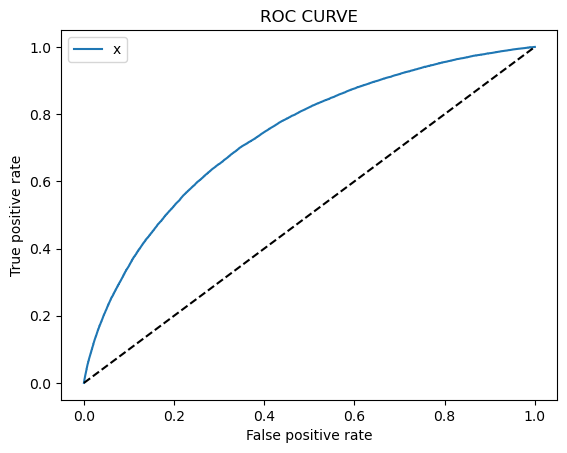

In [24]:
lr_model(x,y,C=0.1)
lr_model

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SK_ID_CURR    307511 non-null  int64  
 1   EXT_SOURCE_1  307511 non-null  float64
 2   EXT_SOURCE_2  307511 non-null  float64
 3   EXT_SOURCE_3  307511 non-null  float64
 4   PAYMENT_RATE  307511 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 11.7 MB


In [17]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64